# Quick and Dirty Digital Currency Comparison <html>&ndash;</html> Ethereum and Bitcoin

## Question: How have the closing prices in Ethereum and Bitcoin changed together?

My hypothesis here is that they, at least recently, have been more or less moving up and down together, albeit with some time lag. If the visualization bears this out, then a possible explanation is that sentiment changes for Bitcoin lead to similar price movements for Ethereum, albeit with time lag, given the large differences in volume of coins and pricing per coin.

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import requests

from bs4 import BeautifulSoup

%matplotlib inline

NOW = str(datetime.datetime.now().date())

In [2]:
NOW = NOW.split('-')
NOW = ''.join(NOW)

In [3]:
r = requests.get("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20170101&end={}".format(NOW))
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.table
columns = [th.text for th in table.findAll("th")]
rows = np.array([row.text for row in table.findAll("td")])
rows = rows.reshape(int(len(rows)/len(columns)), len(columns))
eth = pd.DataFrame(data = rows, columns = columns)
eth[eth.columns[1:]] = eth[eth.columns[1:]].apply(lambda x: x.str.replace(',', '').astype("float"))
eth.Date = pd.to_datetime(eth.Date)
eth.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-05-08,755.01,774.25,728.13,752.86,2.920490e+09,7.496920e+10
1,2018-05-07,793.34,795.76,710.18,753.73,4.316120e+09,7.875870e+10
2,2018-05-06,816.09,835.06,764.88,792.31,3.105570e+09,8.100020e+10
3,2018-05-05,784.58,827.46,784.24,816.12,3.035040e+09,7.785700e+10
4,2018-05-04,776.77,803.75,762.63,785.62,3.533410e+09,7.706620e+10


In [4]:
r = requests.get("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170101&end={}".format(NOW))
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.table
rows = np.array([row.text for row in table.findAll("td")])
columns = [th.text for th in table.findAll("th")]
rows = rows.reshape(int(len(rows)/len(columns)), len(columns))
btc = pd.DataFrame(data = rows, columns = columns)
btc[btc.columns[1:]] = btc[btc.columns[1:]].apply(lambda x: x.str.replace(',', '').astype("float"))
btc.Date = pd.to_datetime(btc.Date)
btc.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-05-08,9380.87,9462.75,9127.77,9234.82,7.415870e+09,1.596720e+11
1,2018-05-07,9645.67,9665.85,9231.53,9373.01,7.394020e+09,1.641610e+11
2,2018-05-06,9845.31,9940.14,9465.25,9654.80,7.222280e+09,1.675410e+11
3,2018-05-05,9700.28,9964.50,9695.12,9858.15,7.651940e+09,1.650550e+11
4,2018-05-04,9695.50,9779.20,9585.96,9700.76,8.217830e+09,1.649560e+11


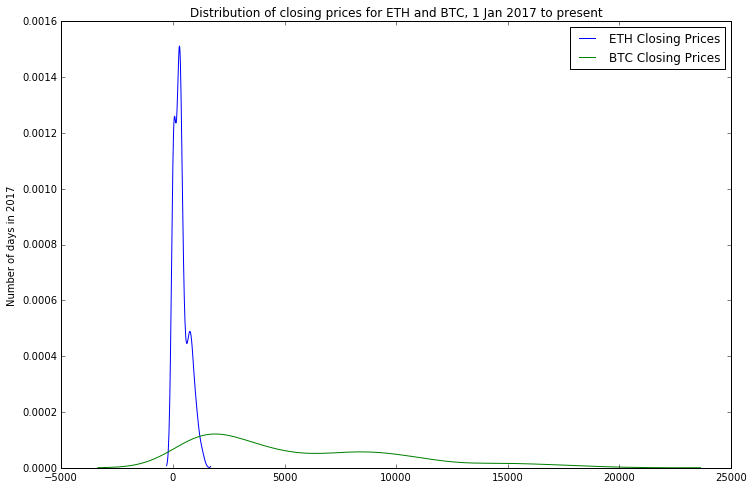

In [5]:
plt.figure(figsize=(12,8));
plt.title("Distribution of closing prices for ETH and BTC, 1 Jan 2017 to present");
plt.ylabel("Number of days in 2017");
sns.kdeplot(data=eth.Close);
sns.kdeplot(data=btc.Close);
plt.legend(["ETH Closing Prices", "BTC Closing Prices"]);
plt.show();

In [6]:
from matplotlib import dates

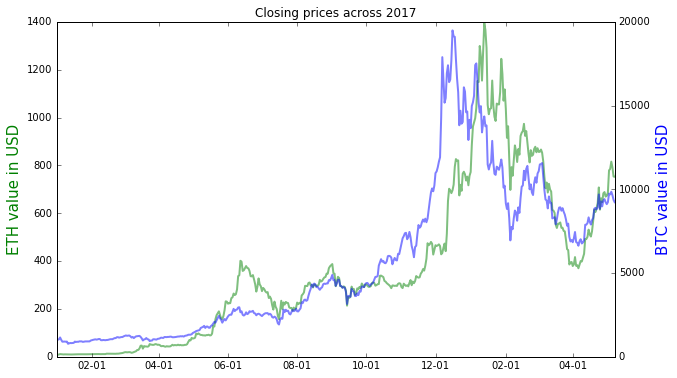

In [47]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

ax1.set_title("Closing prices across 2017")

hfmt = dates.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(hfmt)
ax1.xaxis_date()
ax1.set_ylabel("ETH value in USD", {'color':'green', 'size':15})
ax1.plot(list(eth.Date), eth.Close, '-g', linewidth=2, alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(list(eth.Date), btc.Close, '-b', linewidth=2, alpha=0.5)
ax2.set_ylabel("BTC value in USD", {'color':'blue', 'size':15});

### Discussion
To my surprise, in terms of price gains/losses relative to the sum of coin values across 2017, ETH appears to be even more unstable than BTC, though their movements seem tightly correlated. That said, the year-long relative trajectory is unmistakable&mdash;massive growth, particularly in the month of December for BTC, and as predicted, the explosion in ETH value lagged by about a month, possibly as people shifted money out of BTC and into ETH (note its rapid drop just as ETH really took off in January).